# Lab | Making predictions with logistic regression

In this lab, you will be using the [Sakila](https://dev.mysql.com/doc/sakila/en/) database of movie rentals.

In order to optimize our inventory, we would like to know which films will be rented. We are asked to create a model to predict it. So we use the information we have from May 2005 to create the model.

### Instructions

1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X). 
2. Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our **TARGET** (y) variable.
3. Read the data into a Pandas dataframe.  At this point you should have 1000 rows.  Number of columns depends on the number of features you chose.
4. Analyze extracted features (X) and transform them. You may need to encode some categorical variables, or scale numerical variables.
5. Create a logistic regression model to predict 'rented_in_may' from the cleaned data.
6. Evaluate the results.


In [1]:
# Import Libraries
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# get the Connection to Mysql database
password = getpass.getpass()
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

 ········


In [3]:
# Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X).
# Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our TARGET (y) variable.
query = '''select 
    f.film_id,
    f.title,
    f.description,
    f.rental_duration,
    f.rental_rate,
    f.length,
    f.replacement_cost,
    f.rating,
    f.special_features,
CASE WHEN MONTH(r.rental_date) = 5 AND YEAR(r.rental_date) = 2005 THEN 1
ELSE 0 
END AS rented_in_may
from sakila.film f
LEFT JOIN sakila.inventory i
USING(film_id)
LEFT JOIN sakila.rental r
USING(inventory_id)
group by f.film_id,f.title,f.rating,f.rental_rate'''
data = pd.read_sql_query(query, engine)
pd.set_option('display.max_columns', None)
data.head(50)
#pd.read_sql('select * from sakila.film',engine)

,film_id,title,description,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rented_in_may
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",0
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,6,2.99,130,22.99,G,Deleted Scenes,1
5,6,AGENT TRUMAN,A Intrepid Panorama of a Robot And a Boy who m...,3,2.99,169,17.99,PG,Deleted Scenes,1
6,7,AIRPLANE SIERRA,A Touching Saga of a Hunter And a Butler who m...,6,4.99,62,28.99,PG-13,"Trailers,Deleted Scenes",0
7,8,AIRPORT POLLOCK,A Epic Tale of a Moose And a Girl who must Con...,6,4.99,54,15.99,R,Trailers,1
8,9,ALABAMA DEVIL,A Thoughtful Panorama of a Database Administra...,3,2.99,114,21.99,PG-13,"Trailers,Deleted Scenes",0
9,10,ALADDIN CALENDAR,A Action-Packed Tale of a Man And a Lumberjack...,6,4.99,63,24.99,NC-17,"Trailers,Deleted Scenes",0


In [4]:
data.shape

(1000, 10)

In [5]:
data.isna().sum()

film_id             0
title               0
description         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
rented_in_may       0
dtype: int64

In [6]:
data.dtypes

film_id               int64
title                object
description          object
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
special_features     object
rented_in_may         int64
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
film_id,1000.0,500.500,288.819436,1.00,250.75,500.50,750.25,1000.00
rental_duration,1000.0,4.985,1.411654,3.00,4.00,5.00,6.00,7.00
rental_rate,1000.0,2.980,1.646393,0.99,0.99,2.99,4.99,4.99
length,1000.0,115.272,40.426332,46.00,80.00,114.00,149.25,185.00
replacement_cost,1000.0,19.984,6.050833,9.99,14.99,19.99,24.99,29.99
rented_in_may,1000.0,0.225,0.417791,0.00,0.00,0.00,0.00,1.00


In [8]:
data['rental_duration'].value_counts(dropna = False)

rental_duration
6    212
3    203
4    203
7    191
5    191
Name: count, dtype: int64

In [9]:
data['rental_duration'] = data['rental_duration'].astype(object)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
film_id,1000.0,500.500,288.819436,1.00,250.75,500.50,750.25,1000.00
rental_rate,1000.0,2.980,1.646393,0.99,0.99,2.99,4.99,4.99
length,1000.0,115.272,40.426332,46.00,80.00,114.00,149.25,185.00
replacement_cost,1000.0,19.984,6.050833,9.99,14.99,19.99,24.99,29.99
rented_in_may,1000.0,0.225,0.417791,0.00,0.00,0.00,0.00,1.00


In [11]:
# Dropp film_id because it is not necessary feature to predict our model
data = data.drop('film_id',axis=1)
data

,title,description,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rented_in_may
0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",0
1,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",0
2,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",0
3,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",0
4,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,6,2.99,130,22.99,G,Deleted Scenes,1
...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",0
996,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",0
997,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,6,0.99,105,10.99,NC-17,Deleted Scenes,0
998,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",0


In [12]:
data['replacement_cost'].value_counts(dropna = False)

replacement_cost
20.99    57
22.99    55
12.99    55
21.99    55
13.99    55
27.99    53
29.99    53
14.99    51
19.99    50
10.99    49
11.99    49
17.99    47
26.99    46
23.99    45
25.99    43
18.99    42
28.99    41
9.99     41
24.99    38
16.99    38
15.99    37
Name: count, dtype: int64

In [13]:
data['rental_rate'].value_counts(dropna = False)

rental_rate
0.99    341
4.99    336
2.99    323
Name: count, dtype: int64

In [14]:
# Cast rental_rate from int to object
data['rental_rate'] = data['rental_rate'].astype(object)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1000.0,115.272,40.426332,46.00,80.00,114.00,149.25,185.00
replacement_cost,1000.0,19.984,6.050833,9.99,14.99,19.99,24.99,29.99
rented_in_may,1000.0,0.225,0.417791,0.00,0.00,0.00,0.00,1.00


In [16]:
data.select_dtypes(include = 'object')

,title,description,rental_duration,rental_rate,rating,special_features
0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,6,0.99,PG,"Deleted Scenes,Behind the Scenes"
1,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,3,4.99,G,"Trailers,Deleted Scenes"
2,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,7,2.99,NC-17,"Trailers,Deleted Scenes"
3,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,5,2.99,G,"Commentaries,Behind the Scenes"
4,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,6,2.99,G,Deleted Scenes
...,...,...,...,...,...,...
995,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,6,0.99,G,"Trailers,Behind the Scenes"
996,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,4,0.99,NC-17,"Trailers,Behind the Scenes"
997,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,6,0.99,NC-17,Deleted Scenes
998,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,5,2.99,R,"Trailers,Deleted Scenes"


In [17]:
# Split the combined special features into distinct categories
data['special_features_split'] = data['special_features'].str.split(',')

# Flatten the list of lists into a single list of unique features
unique_features = set([feature for sublist in data['special_features_split'] for feature in sublist])

# Create a binary column for each unique feature
for feature in unique_features:
    data[feature.strip()] = data['special_features'].str.contains(feature, regex=False).astype(int)

# Drop unnecessary columns
data.drop(['special_features', 'special_features_split'], axis=1, inplace=True)
data

,title,description,rental_duration,rental_rate,length,replacement_cost,rating,rented_in_may,Deleted Scenes,Trailers,Behind the Scenes,Commentaries
0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,6,0.99,86,20.99,PG,0,1,0,1,0
1,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,3,4.99,48,12.99,G,0,1,1,0,0
2,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,7,2.99,50,18.99,NC-17,0,1,1,0,0
3,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,5,2.99,117,26.99,G,0,0,0,1,1
4,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,6,2.99,130,22.99,G,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,6,0.99,183,9.99,G,0,0,1,1,0
996,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,4,0.99,179,14.99,NC-17,0,0,1,1,0
997,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,6,0.99,105,10.99,NC-17,0,1,0,0,0
998,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,5,2.99,101,28.99,R,0,1,1,0,0


In [18]:
# Type Cast all special features to object 
data['Deleted Scenes'] = data['Deleted Scenes'].astype(object)
data['Commentaries'] = data['Commentaries'].astype(object)
data['Behind the Scenes'] = data['Behind the Scenes'].astype(object)
data['Trailers'] = data['Trailers'].astype(object)

In [19]:
data.select_dtypes(include ='object')

,title,description,rental_duration,rental_rate,rating,Deleted Scenes,Trailers,Behind the Scenes,Commentaries
0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,6,0.99,PG,1,0,1,0
1,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,3,4.99,G,1,1,0,0
2,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,7,2.99,NC-17,1,1,0,0
3,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,5,2.99,G,0,0,1,1
4,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,6,2.99,G,1,0,0,0
...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,6,0.99,G,0,1,1,0
996,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,4,0.99,NC-17,0,1,1,0
997,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,6,0.99,NC-17,1,0,0,0
998,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,5,2.99,R,1,1,0,0


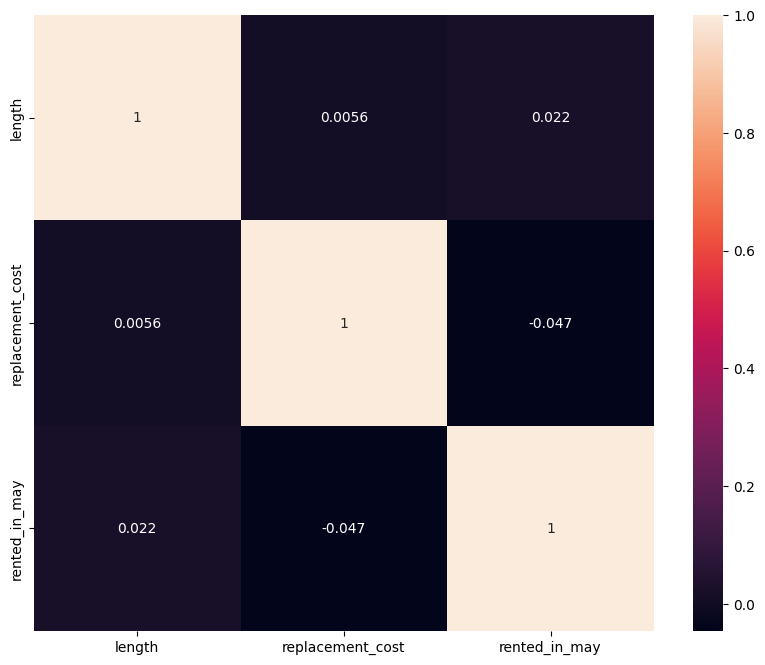

In [20]:
# Find Correaltion of numerical features
corr_matrix=data.select_dtypes('number').corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

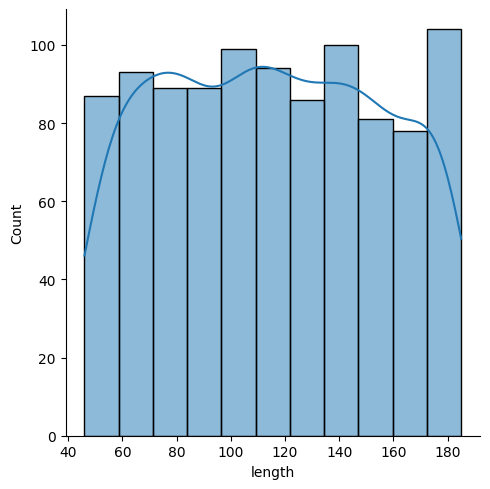

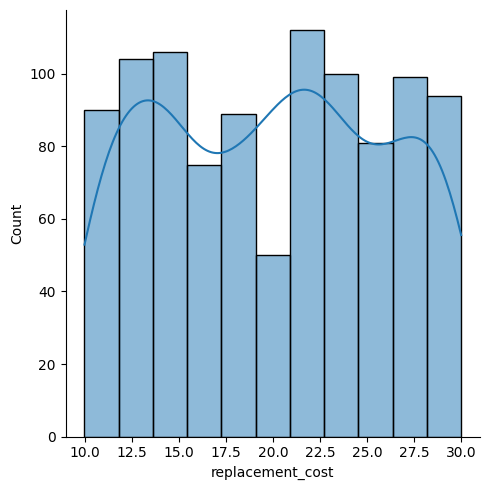

In [21]:
# look at the scale and distribution of values

sns.displot(data['length'], kde=True)
plt.show()

sns.displot(data['replacement_cost'], kde=True)
plt.show()

In [22]:
# X-y Split
y = data['rented_in_may']
X = data.drop('rented_in_may', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [23]:
y_train.dtypes

dtype('int64')

In [24]:
# Scaling the numerical Features using MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,length,replacement_cost
0,0.769784,0.70
1,0.151079,0.65
2,0.258993,1.00
3,0.223022,0.70
4,0.733813,0.65
...,...,...
795,0.151079,0.70
796,0.683453,0.40
797,0.467626,0.15
798,0.906475,0.70


In [25]:
# Categorical Features
X_train_categorical = X_train.select_dtypes(include = object)
X_train_categorical

,title,description,rental_duration,rental_rate,rating,Deleted Scenes,Trailers,Behind the Scenes,Commentaries
46,BABY HALL,A Boring Character Study of a A Shark And a Gi...,5,4.99,NC-17,0,0,0,1
789,SHOOTIST SUPERFLY,A Fast-Paced Story of a Crocodile And a A Shar...,6,0.99,PG-13,0,1,0,0
722,REIGN GENTLEMEN,A Emotional Yarn of a Composer And a Man who m...,3,2.99,PG-13,1,0,1,0
283,ENEMY ODDS,A Fanciful Panorama of a Mad Scientist And a W...,5,4.99,NC-17,0,1,0,0
39,ARMY FLINTSTONES,A Boring Saga of a Database Administrator And ...,4,0.99,R,0,1,0,1
...,...,...,...,...,...,...,...,...,...
167,COMANCHEROS ENEMY,A Boring Saga of a Lumberjack And a Monkey who...,5,0.99,R,0,1,1,0
232,DISCIPLE MOTHER,A Touching Reflection of a Mad Scientist And a...,3,0.99,PG,1,1,1,0
860,SUIT WALLS,A Touching Panorama of a Lumberjack And a Fris...,3,4.99,R,0,0,0,1
189,CREEPERS KANE,A Awe-Inspiring Reflection of a Squirrel And a...,5,4.99,NC-17,0,1,1,0


In [26]:
# Drop Unnecessary categorical Features
X_train_categorical = X_train_categorical.drop('description',axis=1)
X_train_categorical

,title,rental_duration,rental_rate,rating,Deleted Scenes,Trailers,Behind the Scenes,Commentaries
46,BABY HALL,5,4.99,NC-17,0,0,0,1
789,SHOOTIST SUPERFLY,6,0.99,PG-13,0,1,0,0
722,REIGN GENTLEMEN,3,2.99,PG-13,1,0,1,0
283,ENEMY ODDS,5,4.99,NC-17,0,1,0,0
39,ARMY FLINTSTONES,4,0.99,R,0,1,0,1
...,...,...,...,...,...,...,...,...
167,COMANCHEROS ENEMY,5,0.99,R,0,1,1,0
232,DISCIPLE MOTHER,3,0.99,PG,1,1,1,0
860,SUIT WALLS,3,4.99,R,0,0,0,1
189,CREEPERS KANE,5,4.99,NC-17,0,1,1,0


In [27]:
X_train_categorical = X_train_categorical.drop('title',axis=1)
X_train_categorical

,rental_duration,rental_rate,rating,Deleted Scenes,Trailers,Behind the Scenes,Commentaries
46,5,4.99,NC-17,0,0,0,1
789,6,0.99,PG-13,0,1,0,0
722,3,2.99,PG-13,1,0,1,0
283,5,4.99,NC-17,0,1,0,0
39,4,0.99,R,0,1,0,1
...,...,...,...,...,...,...,...
167,5,0.99,R,0,1,1,0
232,3,0.99,PG,1,1,1,0
860,3,4.99,R,0,0,0,1
189,5,4.99,NC-17,0,1,1,0


In [28]:
# Use OneHot Encoding to encode categorical Features
encoder = OneHotEncoder(drop='first').fit(X_train_categorical)
cols = encoder.get_feature_names_out(input_features=X_train_categorical.columns)
X_cat_encode = pd.DataFrame(encoder.transform(X_train_categorical).toarray(),columns=cols)
X_cat_encode.head()

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,Deleted Scenes_1,Trailers_1,Behind the Scenes_1,Commentaries_1
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [29]:
# Concate Numerical and Categorical Features
X_train_transformed = pd.concat([X_train_norm,X_cat_encode],axis=1)
X_train_transformed

,length,replacement_cost,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,Deleted Scenes_1,Trailers_1,Behind the Scenes_1,Commentaries_1
0,0.769784,0.70,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.151079,0.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.258993,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.223022,0.70,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.733813,0.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.151079,0.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
796,0.683453,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
797,0.467626,0.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
798,0.906475,0.70,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [30]:
# Use Logistic Regression Model 
classification = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train_transformed, y_train)
classification

LogisticRegression(random_state=0)

In [31]:
X_test_num = X_test.select_dtypes(include = np.number)
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm.head()

,length,replacement_cost
0,0.374101,0.15
1,0.964029,0.70
2,0.316547,0.45
3,0.618705,0.30
4,0.453237,0.35


In [32]:
X_test_categorical = X_test.select_dtypes(include = object)
X_test_categorical = X_test_categorical.drop('description',axis=1)
X_test_categorical = X_test_categorical.drop('title',axis=1)

In [33]:
encoder = OneHotEncoder(drop='first').fit(X_test_categorical)
cols = encoder.get_feature_names_out(input_features=X_test_categorical.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_categorical).toarray(),columns=cols)
X_test_cat_encode.head()

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,Deleted Scenes_1,Trailers_1,Behind the Scenes_1,Commentaries_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [34]:
X_test_transformed = pd.concat([X_test_norm,X_test_cat_encode],axis=1)
X_test_transformed

,length,replacement_cost,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,Deleted Scenes_1,Trailers_1,Behind the Scenes_1,Commentaries_1
0,0.374101,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.964029,0.70,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.316547,0.45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.618705,0.30,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.453237,0.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.402878,0.95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
196,0.446043,0.85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
197,0.273381,0.70,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
198,0.294964,0.80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
# Calculate score of our model
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.745

In [36]:
print(y_test.value_counts())

rented_in_may
0    149
1     51
Name: count, dtype: int64


In [37]:
pd.Series(predictions).value_counts()

0    200
Name: count, dtype: int64

In [38]:
# Confusion Matrix 
confusion_matrix(y_test, predictions)

array([[149,   0],
       [ 51,   0]], dtype=int64)